## Libraries

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colormaps
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

## Loading and Exploring the Data

In [23]:
# Loading the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Exploring the first few rows
train_df.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,...,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,high Dropped calls,No Usage,target,id
0,F,50.0,20/05/98,29.200000,2.0,Play 100,BS210,62.0,153.000000,185.0,...,OK,0.150531,0.246536,0.706735,0.046729,0.203034,F,F,0,K262360
1,M,25.0,16/12/96,46.533333,1.0,CAT 100,ASAD90,146.0,718.800000,98.0,...,OK,0.188988,0.780710,0.178886,0.040404,0.273249,F,F,1,K170160
2,F,46.0,27/08/97,38.066667,1.0,CAT 50,WC95,160.0,322.800000,7.0,...,OK,0.239300,0.722633,0.277367,0.000000,0.205025,F,F,0,K331610
3,F,59.0,13/07/98,27.400000,1.0,CAT 50,BS110,84.0,317.400001,57.0,...,OK,0.221467,0.662492,0.337508,0.000000,0.050090,F,F,0,K332460
4,F,25.0,08/01/99,21.433333,1.0,Play 300,WC95,14.0,309.600000,326.0,...,OK,0.107509,0.321896,0.663132,0.014972,0.090509,F,F,0,K394220


In [24]:
test_df.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,...,Total_Cost,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,high Dropped calls,No Usage,id
0,F,20.0,23/05/96,55.582251,3.0,CAT 200,WC95,513.0,1075.667903,110.0,...,167.242853,OK,0.116924,0.824189,0.173365,0.009823,0.020349,F,F,K751808
1,F,54.0,01/03/98,32.067010,0.0,Play 300,BS110,13.0,378.078657,93.0,...,136.404621,OK,0.120457,0.415020,0.532898,0.022391,0.124480,F,F,K837351
2,F,28.0,11/10/98,26.621954,0.0,CAT 200,ASAD170,1000.0,2064.343139,90.0,...,397.739114,OK,0.149435,0.960100,0.034434,0.006660,0.225763,F,F,K548114
3,F,26.0,12/08/98,27.652735,5.0,CAT 200,WC95,122.0,999.111887,126.0,...,196.789012,OK,0.137372,0.745483,0.263256,0.005870,0.108872,F,F,K736156
4,F,34.0,28/10/98,25.479355,0.0,CAT 100,WC95,164.0,742.647381,73.0,...,160.450386,OK,0.180704,0.771754,0.166995,0.056390,0.090896,F,F,K508080


In [25]:
# Unique Churn values
set(train_df['target'])

{0, 1}

In [26]:
# Unique Churn values, alternatively
print(train_df['target'].unique())

[0 1]


In [27]:
# Calculating the ratio size of each churn group
train_df.groupby(['target']).size() / train_df.shape[0] * 100

target
0    85.229976
1    14.770024
dtype: float64

As a general rule of thumb, one should apply under- or over sampling if minority class is 5% or less. 

In [28]:
print(train_df.shape)  # a tuple (number of rows, number of columns)

(5044, 39)


In [29]:
print(train_df.columns.tolist())

['Gender', 'Age', 'Connect_Date', 'L_O_S', 'Dropped_Calls', 'tariff', 'Handset', 'Peak_calls_Sum', 'Peak_mins_Sum', 'OffPeak_calls_Sum', 'OffPeak_mins_Sum', 'Weekend_calls_Sum', 'Weekend_mins_Sum', 'International_mins_Sum', 'Nat_call_cost_Sum', 'AvePeak', 'AveOffPeak', 'AveWeekend', 'National_calls', 'National mins', 'AveNational', 'All_calls_mins', 'Dropped_calls_ratio', 'Usage_Band', 'Mins_charge', 'call_cost_per_min', 'actual call cost', 'Total_call_cost', 'Total_Cost', 'Tariff_OK', 'average cost min', 'Peak ratio', 'OffPeak ratio', 'Weekend ratio', 'Nat-InterNat Ratio', 'high Dropped calls', 'No Usage', 'target', 'id']


In [30]:
train_df.describe() # Summary Statistics for Numerical Data

,Age,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,...,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,target
count,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,...,5040.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000
mean,31.384417,33.626890,2.677042,239.154441,708.610393,104.080293,312.420299,16.487510,50.139360,170.310248,...,10.092345,19.289973,73.909497,187.082344,0.168484,0.609938,0.327813,0.061456,0.162820,0.147700
std,12.767989,14.041931,3.427875,239.627055,503.964199,97.868704,199.094991,16.379353,36.051349,142.238289,...,2.105534,28.161217,60.377401,82.471189,0.078024,0.223795,0.209852,0.063664,0.104220,0.354838
min,12.000000,9.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,59.940000,0.048998,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,21.266667,0.000000,59.000000,307.800001,28.000000,147.525000,4.000000,22.800000,65.511122,...,8.578771,0.000000,32.306809,123.926851,0.134453,0.467401,0.165634,0.021097,0.079444,0.000000
50%,29.000000,33.583334,1.000000,161.000000,611.699999,73.000000,293.699999,12.000000,44.400000,132.281821,...,9.513941,7.800333,58.122962,173.505141,0.154474,0.655549,0.286238,0.043909,0.158947,0.000000
75%,39.000000,45.866667,2.000000,343.000000,1015.950000,156.000000,447.000000,24.000000,72.000000,236.113750,...,11.749149,28.747465,99.011752,232.132750,0.179141,0.782501,0.459535,0.080634,0.244624,0.000000
max,80.000000,58.200000,15.000000,1626.000000,2901.600001,560.000000,1091.099999,124.000000,205.000000,977.723297,...,21.734694,190.464194,463.233885,613.233885,1.357564,1.000000,1.000000,0.797546,2.601223,1.000000


By visual inspection of the summary statistics, there don't appear to be any "impossible" values, but there are a few areas where domain knowledge would be handy (e.g., the Nat-InterNat Ratio, L_O_S (Length of Service maybe?))

In [31]:
train_df.dtypes # Data Types for Each Column

Gender                     object
Age                       float64
Connect_Date               object
L_O_S                     float64
Dropped_Calls             float64
tariff                     object
Handset                    object
Peak_calls_Sum            float64
Peak_mins_Sum             float64
OffPeak_calls_Sum         float64
OffPeak_mins_Sum          float64
Weekend_calls_Sum         float64
Weekend_mins_Sum          float64
International_mins_Sum    float64
Nat_call_cost_Sum         float64
AvePeak                   float64
AveOffPeak                float64
AveWeekend                float64
National_calls            float64
National mins             float64
AveNational               float64
All_calls_mins            float64
Dropped_calls_ratio       float64
Usage_Band                 object
Mins_charge               float64
call_cost_per_min         float64
actual call cost          float64
Total_call_cost           float64
Total_Cost                float64
Tariff_OK     

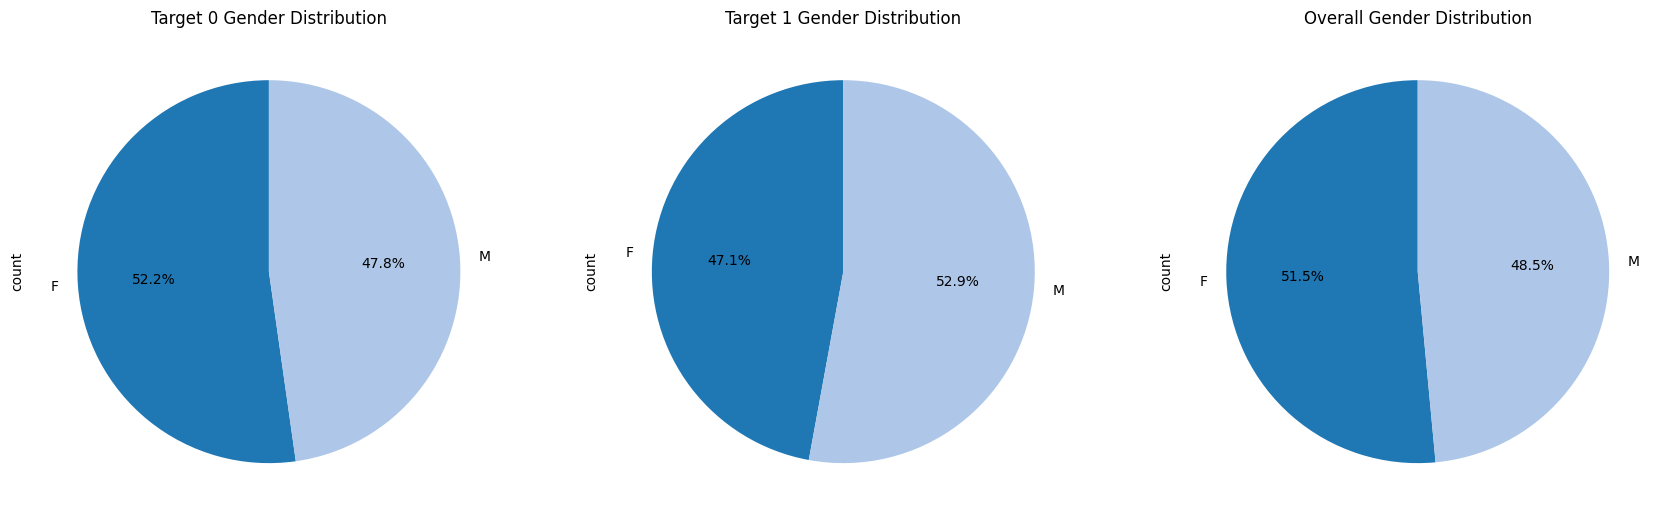

In [90]:
# Get the colormap
colormap = colormaps.get_cmap('tab20')

# Filtering the data by target value
target_0 = train_df[train_df['target'] == 0]['Gender'].value_counts().sort_index()
target_1 = train_df[train_df['target'] == 1]['Gender'].value_counts().sort_index()

# Overall Gender distribution
overall_gender = train_df['Gender'].value_counts().sort_index()

# Calculate the number of unique entries in 'Gender' to determine how many colors we need
num_colors = len(train_df['Gender'].unique())

# Adjusting subplot arrangement to include a third pie chart
fig, ax = plt.subplots(1, 3, figsize=(21, 7))  # Adjust figsize accordingly

# Plot pie chart for target == 0
target_0.plot.pie(autopct='%1.1f%%', startangle=90, ax=ax[0], title='Target 0 Gender Distribution', colors=colormap.colors[:num_colors])

# Plot pie chart for target == 1
target_1.plot.pie(autopct='%1.1f%%', startangle=90, ax=ax[1], title='Target 1 Gender Distribution', colors=colormap.colors[:num_colors])

# Plot pie chart for overall Gender distribution
overall_gender.plot.pie(autopct='%1.1f%%', startangle=90, ax=ax[2], title='Overall Gender Distribution', colors=colormap.colors[:num_colors])

plt.show()

In [75]:
# Unique 'tariff' values
set(train_df['tariff'])

{'CAT 100', 'CAT 200', 'CAT 50', 'Play 100', 'Play 300'}

In [76]:
# Unique 'Handset' values
set(train_df['Handset'])

{'ASAD170',
 'ASAD90',
 'BS110',
 'BS210',
 'CAS30',
 'CAS60',
 'S50',
 'S80',
 'SOP10',
 'SOP20',
 'WC95'}

In [77]:
# Unique 'Usage_Band' values
set(train_df['Usage_Band'])

{'High', 'Low', 'Med', 'MedHigh', 'MedLow', nan}

In [78]:
# Unique 'Tariff_OK' values
set(train_df['Tariff_OK'])

{'High CAT 100', 'High CAT 50', 'High Play 100', 'OK'}

In [79]:
# Unique 'high Dropped calls' values
set(train_df['high Dropped calls'])

{'F', 'T'}

In [80]:
# Unique 'No Usage' values
set(train_df['No Usage'])

{'F', 'T'}

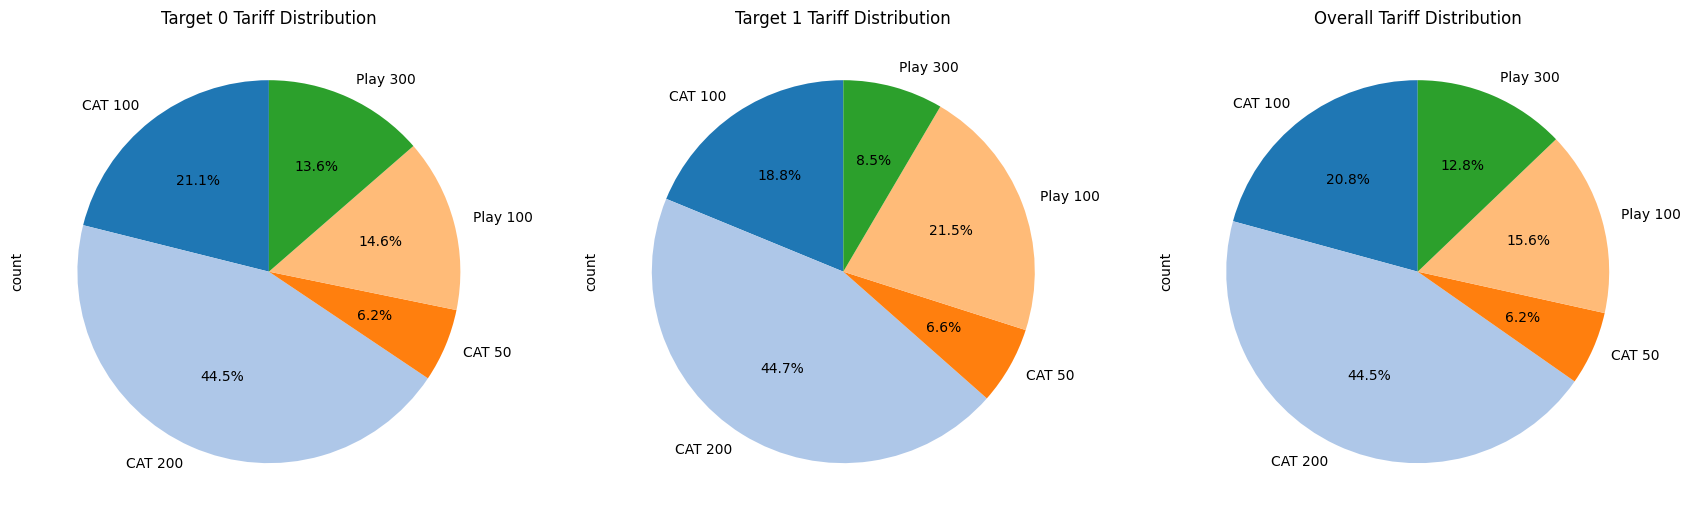

In [93]:
# Get the colormap
colormap = colormaps.get_cmap('tab20')

# Filtering the data by target value for 'tariff'
target_0_tariff = train_df[train_df['target'] == 0]['tariff'].value_counts().sort_index()
target_1_tariff = train_df[train_df['target'] == 1]['tariff'].value_counts().sort_index()

# Overall Tariff distribution
overall_tariff = train_df['tariff'].value_counts().sort_index()

# Calculate the number of unique entries in 'tariff' to determine how many colors we need
num_colors_tariff = len(train_df['tariff'].unique())

# Adjusting subplot arrangement to include a third pie chart
fig, ax = plt.subplots(1, 3, figsize=(21, 7))  # Adjust figsize accordingly

# Plot pie chart for target == 0
target_0_tariff.plot.pie(autopct='%1.1f%%', startangle=90, ax=ax[0], title='Target 0 Tariff Distribution', colors=colormap.colors[:num_colors_tariff])

# Plot pie chart for target == 1
target_1_tariff.plot.pie(autopct='%1.1f%%', startangle=90, ax=ax[1], title='Target 1 Tariff Distribution', colors=colormap.colors[:num_colors_tariff])

# Plot pie chart for overall Tariff distribution
overall_tariff.plot.pie(autopct='%1.1f%%', startangle=90, ax=ax[2], title='Overall Tariff Distribution', colors=colormap.colors[:num_colors_tariff])

plt.show()

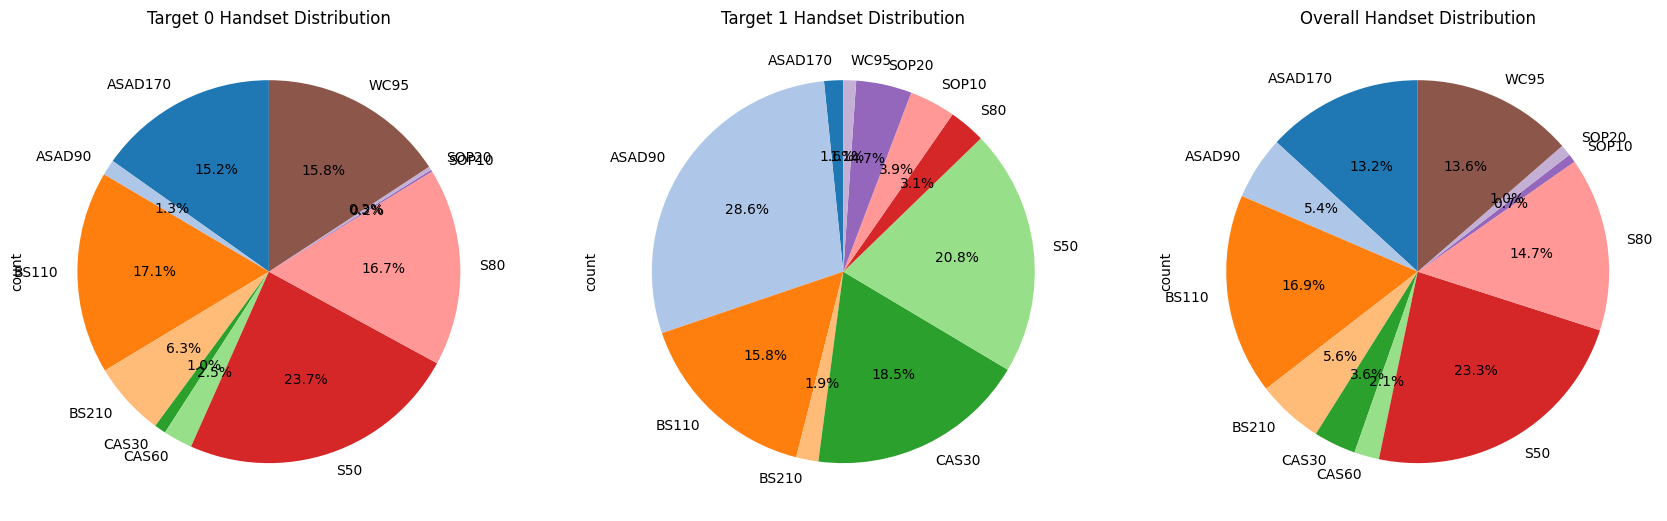

In [94]:
# Get the colormap
colormap = colormaps.get_cmap('tab20')

# Filtering the data by target value for 'Handset'
target_0_handset = train_df[train_df['target'] == 0]['Handset'].value_counts().sort_index()
target_1_handset = train_df[train_df['target'] == 1]['Handset'].value_counts().sort_index()

# Overall Handset distribution
overall_handset = train_df['Handset'].value_counts().sort_index()

# Calculate the number of unique entries in 'Handset' to determine how many colors we need
num_colors_handset = len(train_df['Handset'].unique())

# Adjusting subplot arrangement to include a third pie chart
fig, ax = plt.subplots(1, 3, figsize=(21, 7))  # Adjust figsize accordingly

# Plot pie chart for target == 0
target_0_handset.plot.pie(autopct='%1.1f%%', startangle=90, ax=ax[0], title='Target 0 Handset Distribution', colors=colormap.colors[:num_colors_handset])

# Plot pie chart for target == 1
target_1_handset.plot.pie(autopct='%1.1f%%', startangle=90, ax=ax[1], title='Target 1 Handset Distribution', colors=colormap.colors[:num_colors_handset])

# Plot pie chart for overall Handset distribution
overall_handset.plot.pie(autopct='%1.1f%%', startangle=90, ax=ax[2], title='Overall Handset Distribution', colors=colormap.colors[:num_colors_handset])

plt.show()

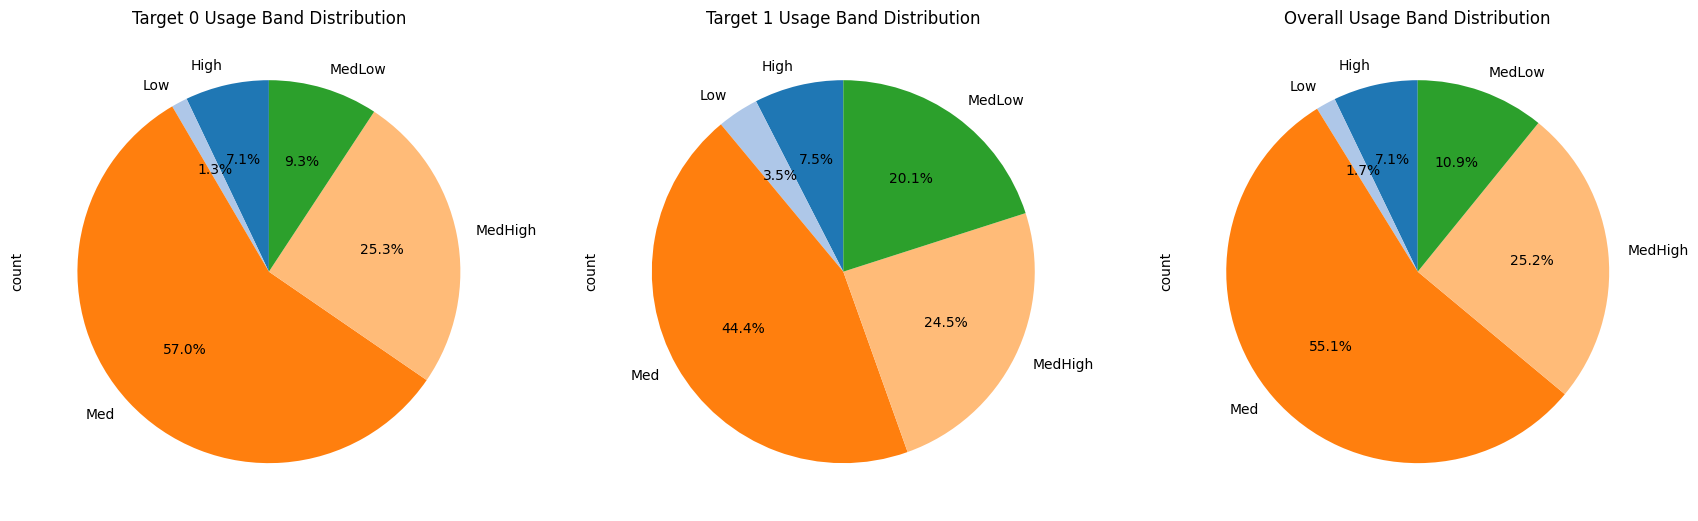

In [95]:
# Filter out NaN values from the 'Usage_Band' column for plotting
train_df_filtered = train_df.dropna(subset=['Usage_Band'])

# Filtering the data by target value for 'Usage_Band'
target_0_usage_band = train_df_filtered[train_df_filtered['target'] == 0]['Usage_Band'].value_counts().sort_index()
target_1_usage_band = train_df_filtered[train_df_filtered['target'] == 1]['Usage_Band'].value_counts().sort_index()

# Overall Usage_Band distribution
overall_usage_band = train_df_filtered['Usage_Band'].value_counts().sort_index()

# Calculate the number of unique entries in 'Usage_Band' (excluding NaN) to determine how many colors we need
num_colors_usage_band = len(train_df_filtered['Usage_Band'].unique())

# Get the colormap
colormap = colormaps.get_cmap('tab20')

# Adjusting subplot arrangement to include a third pie chart
fig, ax = plt.subplots(1, 3, figsize=(21, 7))  # Adjust the figure size accordingly

# Plot pie chart for target == 0
target_0_usage_band.plot.pie(autopct='%1.1f%%', startangle=90, ax=ax[0], title='Target 0 Usage Band Distribution', colors=colormap.colors[:num_colors_usage_band])

# Plot pie chart for target == 1
target_1_usage_band.plot.pie(autopct='%1.1f%%', startangle=90, ax=ax[1], title='Target 1 Usage Band Distribution', colors=colormap.colors[:num_colors_usage_band])

# Plot pie chart for overall Usage_Band distribution
overall_usage_band.plot.pie(autopct='%1.1f%%', startangle=90, ax=ax[2], title='Overall Usage Band Distribution', colors=colormap.colors[:num_colors_usage_band])

plt.show()

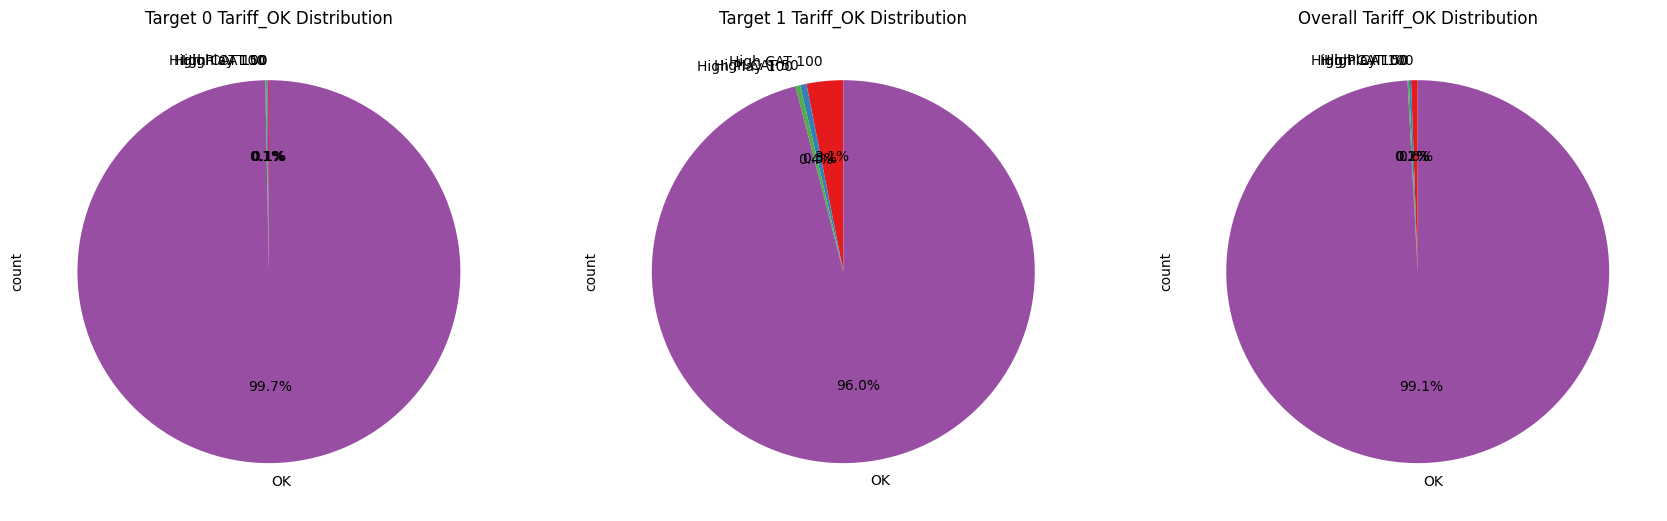

In [96]:
# Get the colormap
colormap = colormaps.get_cmap('Set1')

# Filtering the data by target value for 'Tariff_OK'
target_0_tariff_ok = train_df[train_df['target'] == 0]['Tariff_OK'].value_counts().sort_index()
target_1_tariff_ok = train_df[train_df['target'] == 1]['Tariff_OK'].value_counts().sort_index()

# Overall Tariff_OK distribution
overall_tariff_ok = train_df['Tariff_OK'].value_counts().sort_index()

# Calculate the number of unique entries in 'Tariff_OK' to determine how many colors we need
num_colors_tariff_ok = len(train_df['Tariff_OK'].unique())

# Adjusting subplot arrangement to include a third pie chart
fig, ax = plt.subplots(1, 3, figsize=(21, 7))  # Adjust the figure size accordingly

# Plot pie chart for target == 0
target_0_tariff_ok.plot.pie(autopct='%1.1f%%', startangle=90, ax=ax[0], title='Target 0 Tariff_OK Distribution', colors=colormap.colors[:num_colors_tariff_ok])

# Plot pie chart for target == 1
target_1_tariff_ok.plot.pie(autopct='%1.1f%%', startangle=90, ax=ax[1], title='Target 1 Tariff_OK Distribution', colors=colormap.colors[:num_colors_tariff_ok])

# Plot pie chart for overall Tariff_OK distribution
overall_tariff_ok.plot.pie(autopct='%1.1f%%', startangle=90, ax=ax[2], title='Overall Tariff_OK Distribution', colors=colormap.colors[:num_colors_tariff_ok])

plt.show()

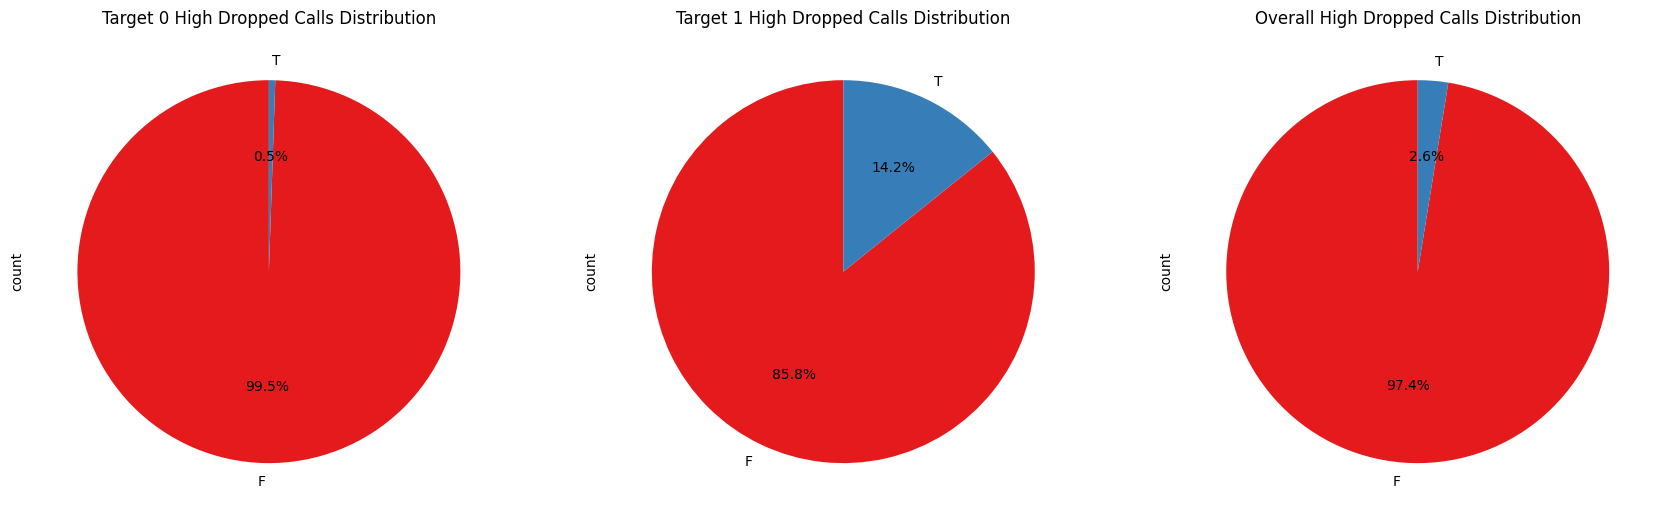

In [97]:
# Get the colormap
colormap = colormaps.get_cmap('Set1')

# Filtering the data by target value for 'high Dropped calls'
target_0_high_dropped_calls = train_df[train_df['target'] == 0]['high Dropped calls'].value_counts().sort_index()
target_1_high_dropped_calls = train_df[train_df['target'] == 1]['high Dropped calls'].value_counts().sort_index()

# Overall 'high Dropped calls' distribution
overall_high_dropped_calls = train_df['high Dropped calls'].value_counts().sort_index()

# Calculate the number of unique entries in 'high Dropped calls' to determine how many colors we need
num_colors_high_dropped_calls = len(train_df['high Dropped calls'].unique())

# Adjusting subplot arrangement to include a third pie chart
fig, ax = plt.subplots(1, 3, figsize=(21, 7))  # Adjust the figure size accordingly

# Plot pie chart for target == 0
target_0_high_dropped_calls.plot.pie(autopct='%1.1f%%', startangle=90, ax=ax[0], title='Target 0 High Dropped Calls Distribution', colors=colormap.colors[:num_colors_high_dropped_calls])

# Plot pie chart for target == 1
target_1_high_dropped_calls.plot.pie(autopct='%1.1f%%', startangle=90, ax=ax[1], title='Target 1 High Dropped Calls Distribution', colors=colormap.colors[:num_colors_high_dropped_calls])

# Plot pie chart for overall 'high Dropped calls' distribution
overall_high_dropped_calls.plot.pie(autopct='%1.1f%%', startangle=90, ax=ax[2], title='Overall High Dropped Calls Distribution', colors=colormap.colors[:num_colors_high_dropped_calls])

plt.show()

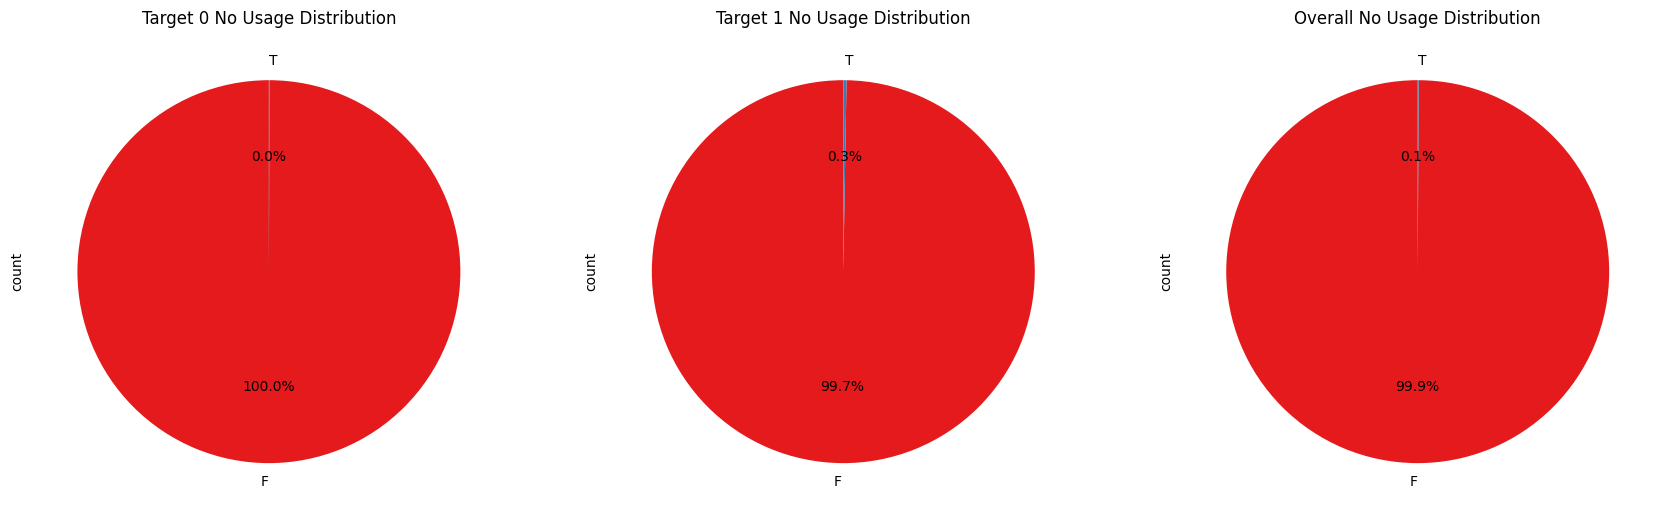

In [98]:
# Get the colormap
colormap = colormaps.get_cmap('Set1')

# Filtering the data by target value for 'No Usage'
target_0_no_usage = train_df[train_df['target'] == 0]['No Usage'].value_counts().sort_index()
target_1_no_usage = train_df[train_df['target'] == 1]['No Usage'].value_counts().sort_index()

# Overall 'No Usage' distribution
overall_no_usage = train_df['No Usage'].value_counts().sort_index()

# Calculate the number of unique entries in 'No Usage' to determine how many colors we need
num_colors_no_usage = len(train_df['No Usage'].unique())

# Adjusting subplot arrangement to include a third pie chart
fig, ax = plt.subplots(1, 3, figsize=(21, 7))  # Adjust the figure size accordingly

# Plot pie chart for target == 0
target_0_no_usage.plot.pie(autopct='%1.1f%%', startangle=90, ax=ax[0], title='Target 0 No Usage Distribution', colors=colormap.colors[:num_colors_no_usage])

# Plot pie chart for target == 1
target_1_no_usage.plot.pie(autopct='%1.1f%%', startangle=90, ax=ax[1], title='Target 1 No Usage Distribution', colors=colormap.colors[:num_colors_no_usage])

# Plot pie chart for overall 'No Usage' distribution
overall_no_usage.plot.pie(autopct='%1.1f%%', startangle=90, ax=ax[2], title='Overall No Usage Distribution', colors=colormap.colors[:num_colors_no_usage])

plt.show()

## Data Preprocessing

### Missing Data

In [12]:
print(train_df.isnull().sum()) # only a few missing, listwise deletion, imputation, dummy, ...

Gender                    0
Age                       0
Connect_Date              0
L_O_S                     0
Dropped_Calls             0
tariff                    0
Handset                   0
Peak_calls_Sum            0
Peak_mins_Sum             0
OffPeak_calls_Sum         0
OffPeak_mins_Sum          0
Weekend_calls_Sum         0
Weekend_mins_Sum          0
International_mins_Sum    0
Nat_call_cost_Sum         0
AvePeak                   0
AveOffPeak                0
AveWeekend                0
National_calls            0
National mins             0
AveNational               0
All_calls_mins            0
Dropped_calls_ratio       4
Usage_Band                4
Mins_charge               0
call_cost_per_min         4
actual call cost          0
Total_call_cost           0
Total_Cost                0
Tariff_OK                 0
average cost min          0
Peak ratio                0
OffPeak ratio             0
Weekend ratio             0
Nat-InterNat Ratio        0
high Dropped calls  

In [113]:
# Listwise deletion => Imputation, WOE to be considered later
train_df_cleaned = train_df.dropna()
print("Original DataFrame shape:", train_df.shape)
print("Cleaned DataFrame shape:", train_df_cleaned.shape)

Original DataFrame shape: (5040, 43)
Cleaned DataFrame shape: (5040, 43)


In [112]:
train_df = train_df_cleaned

### Outliers

In [115]:
# Identifying numerical columns (excluding 'object' and 'datetime' types)
numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

In [117]:
# Checking Outliers Using the IQR Method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_age = detect_outliers_iqr(train_df, 'Age')
print(f"Number of outliers in Age: {len(outliers_age)}")

Number of outliers in Age: 67


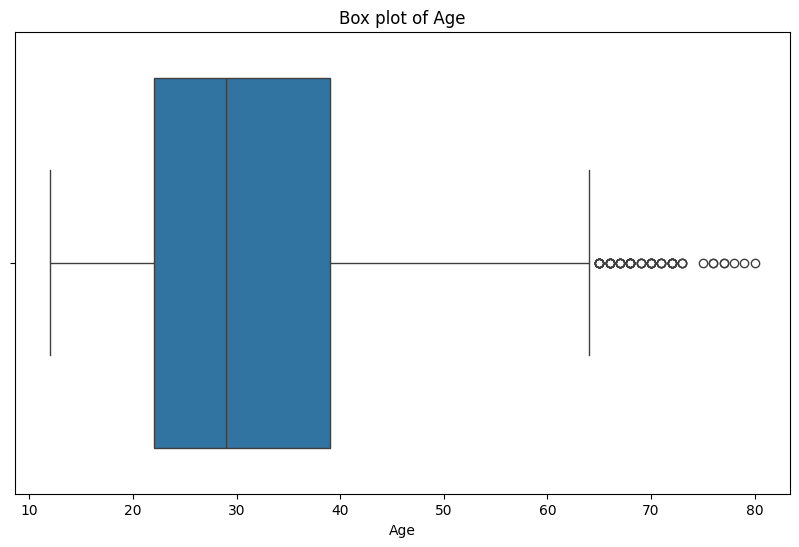

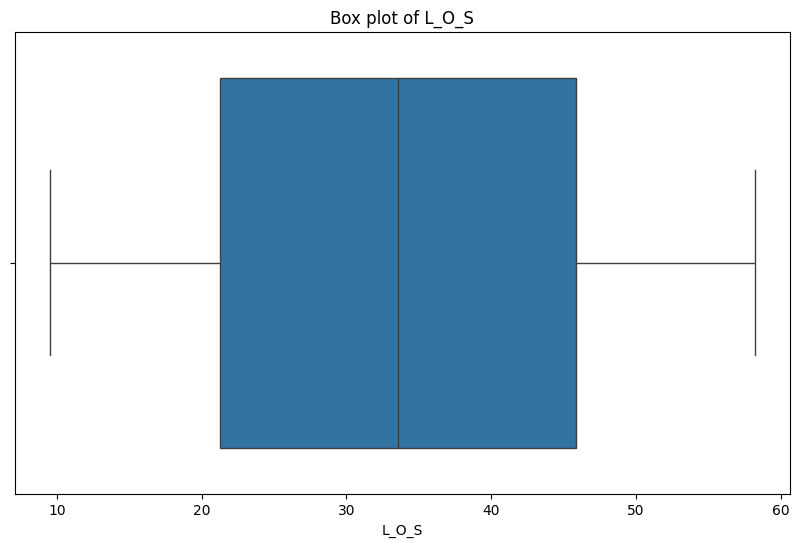

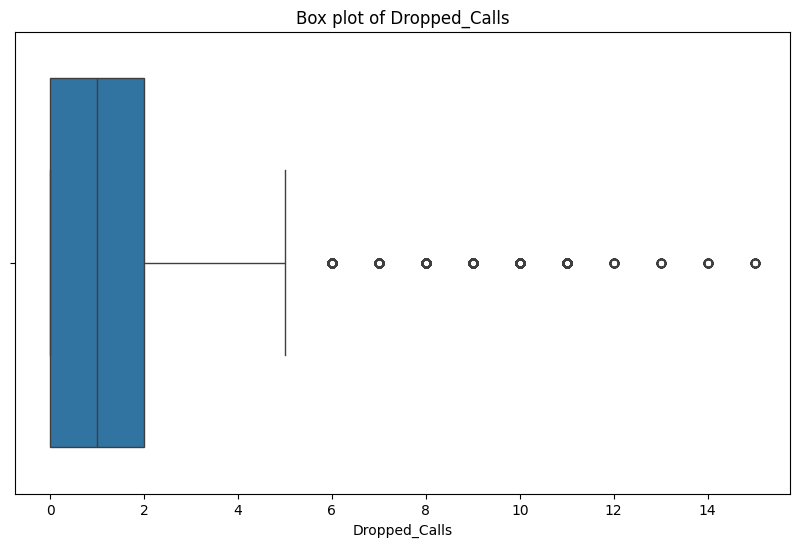

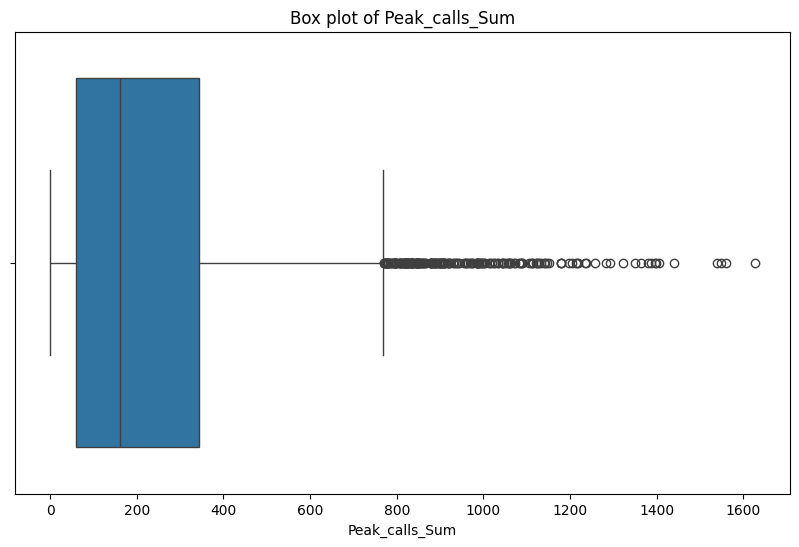

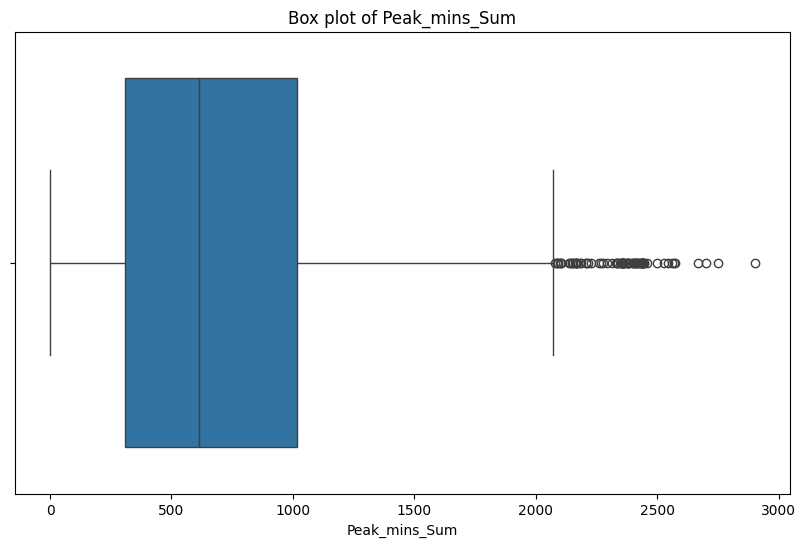

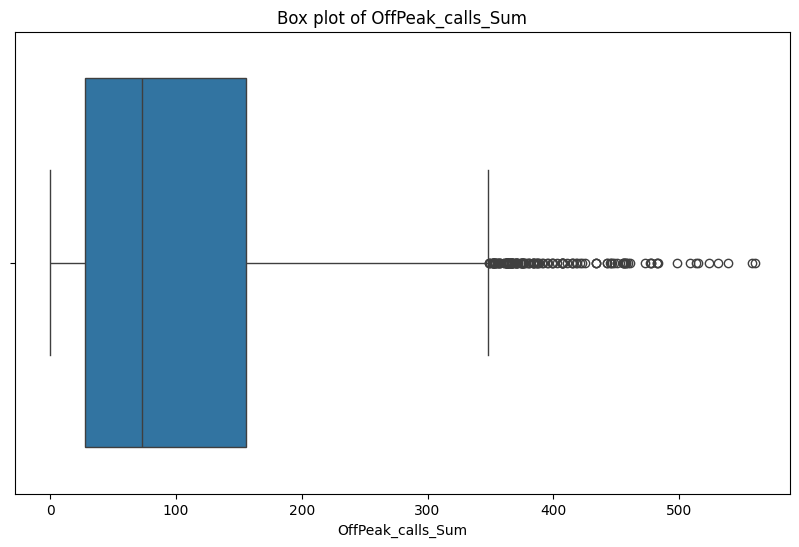

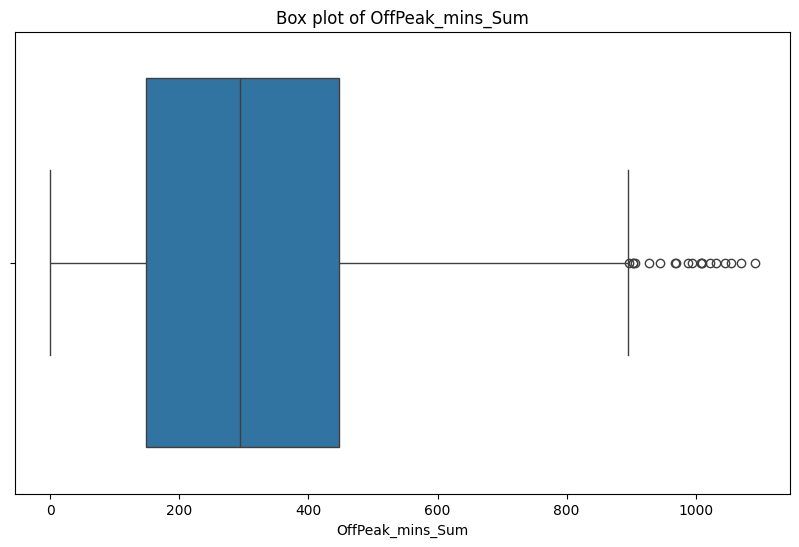

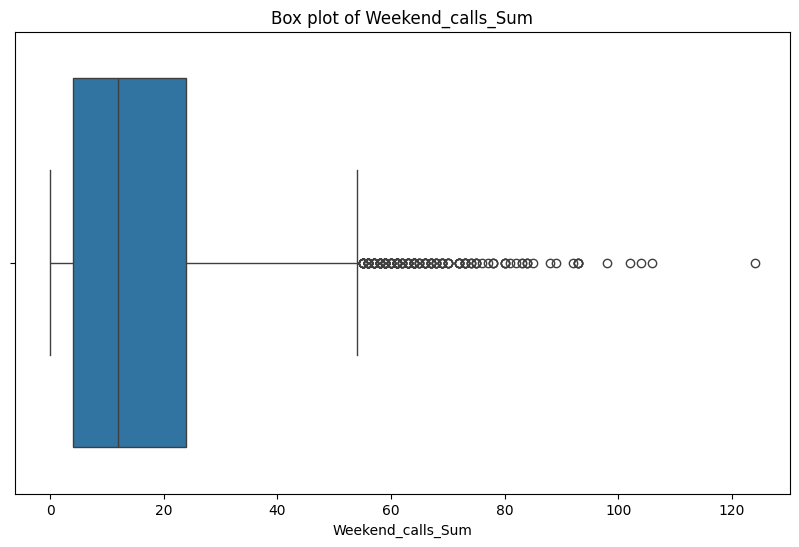

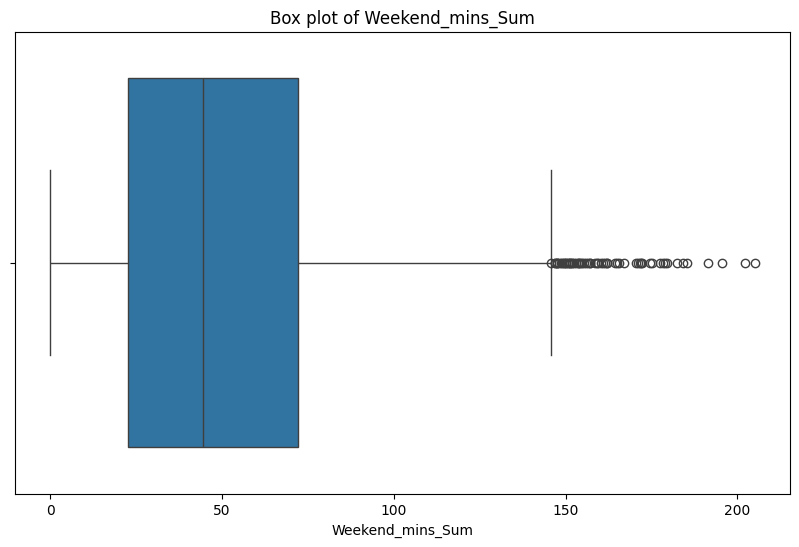

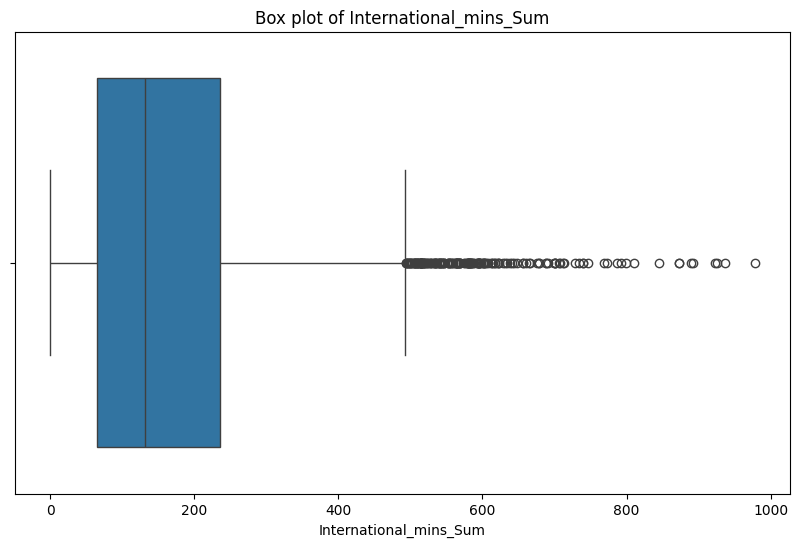

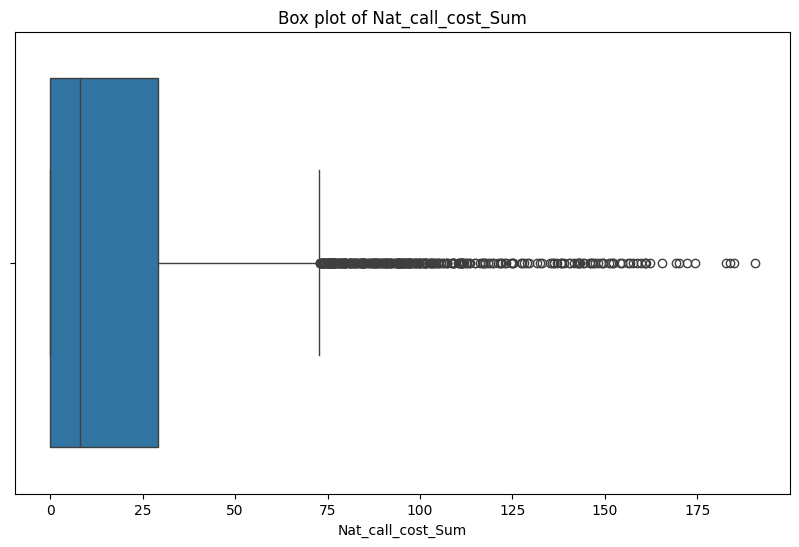

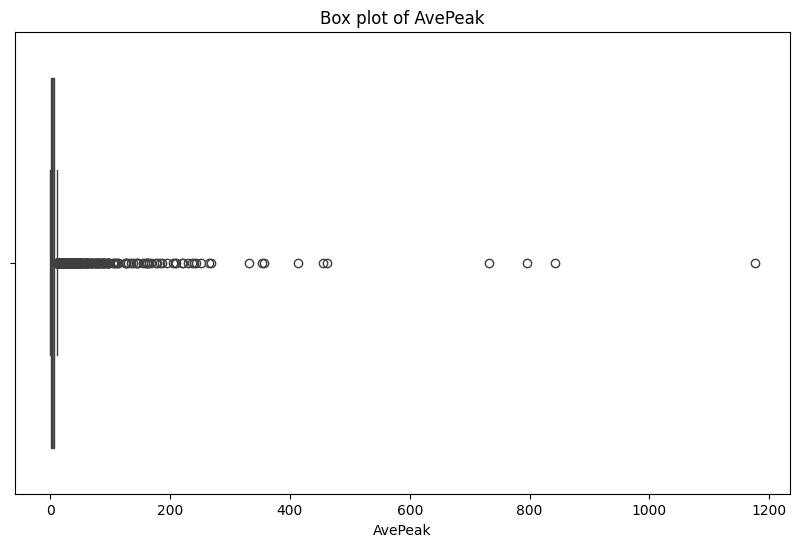

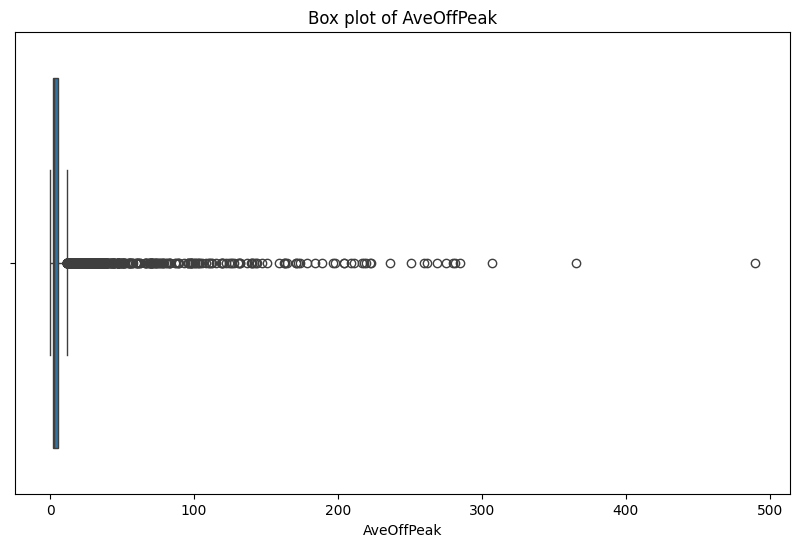

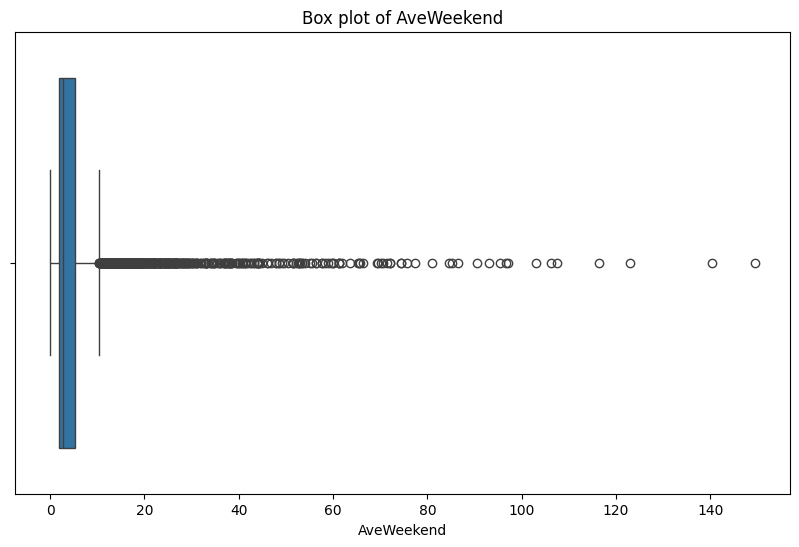

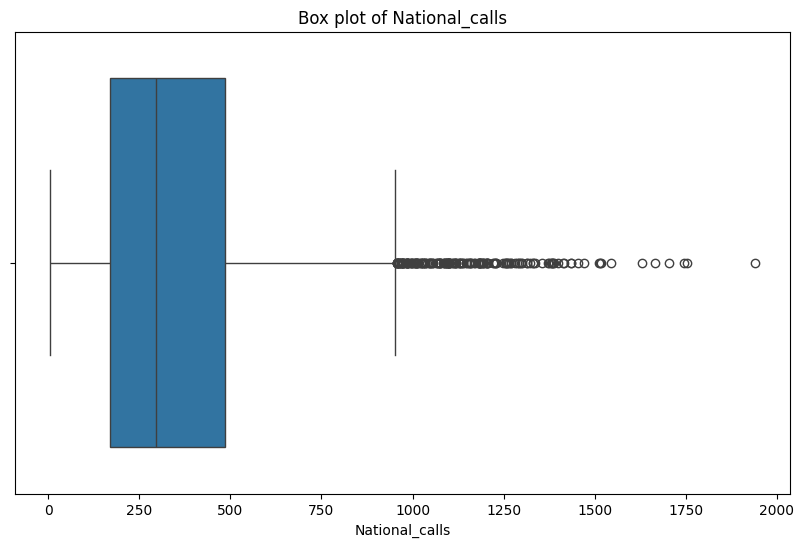

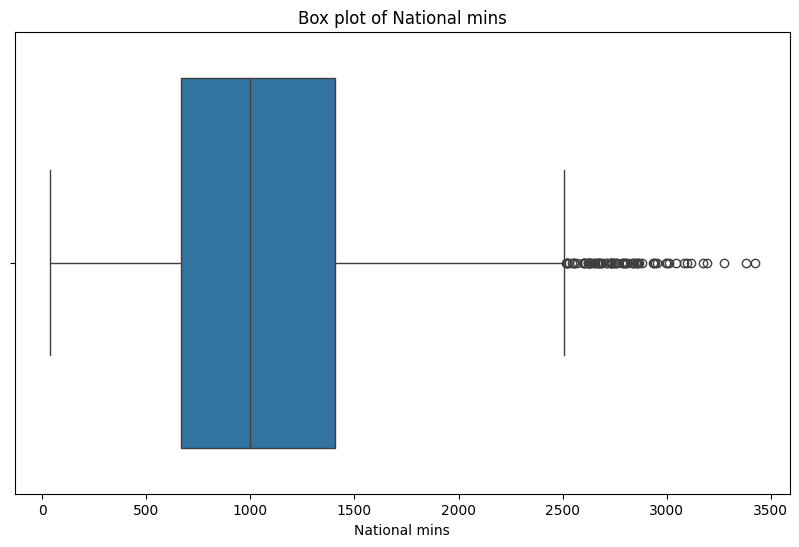

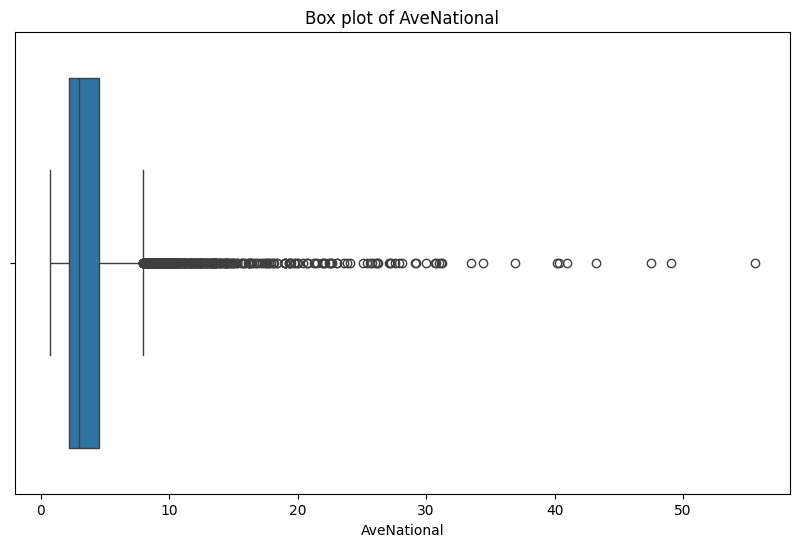

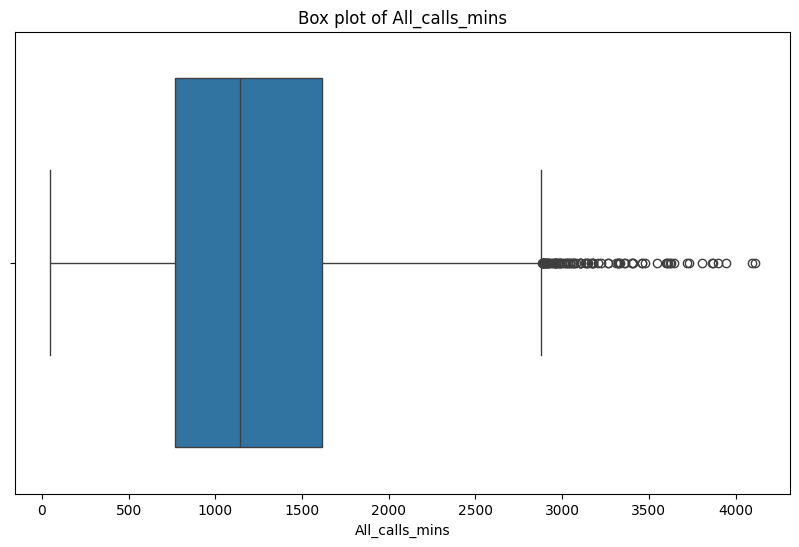

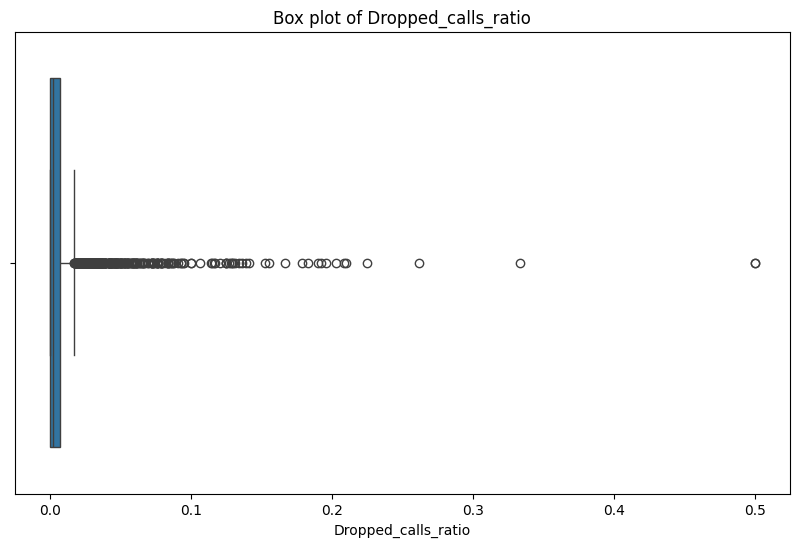

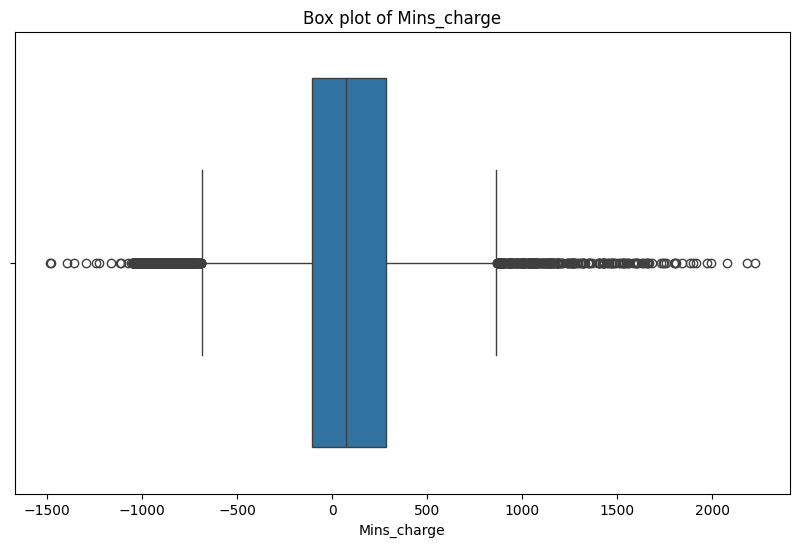

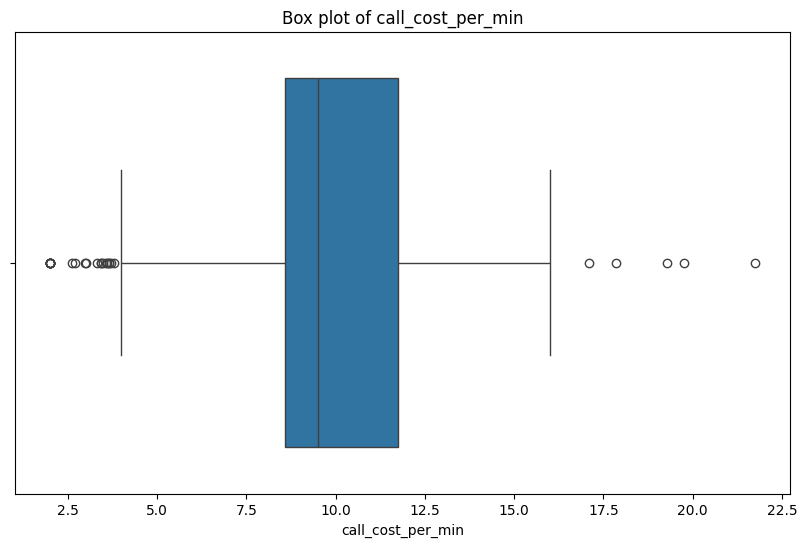

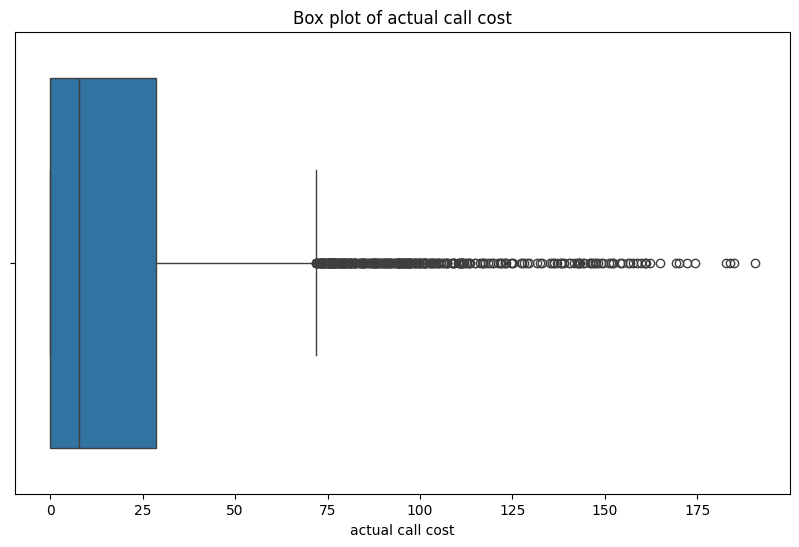

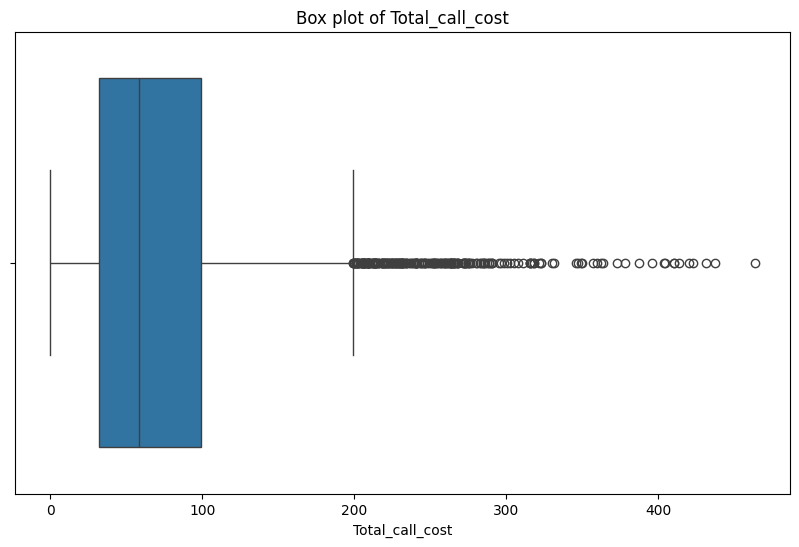

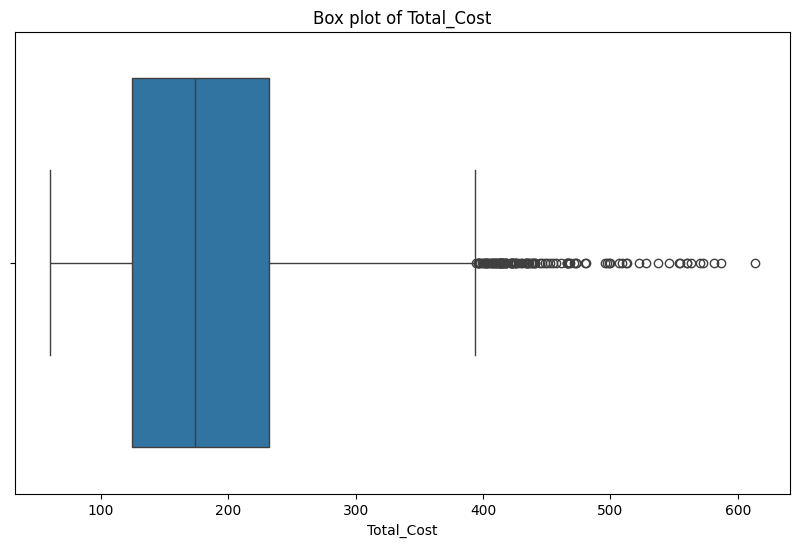

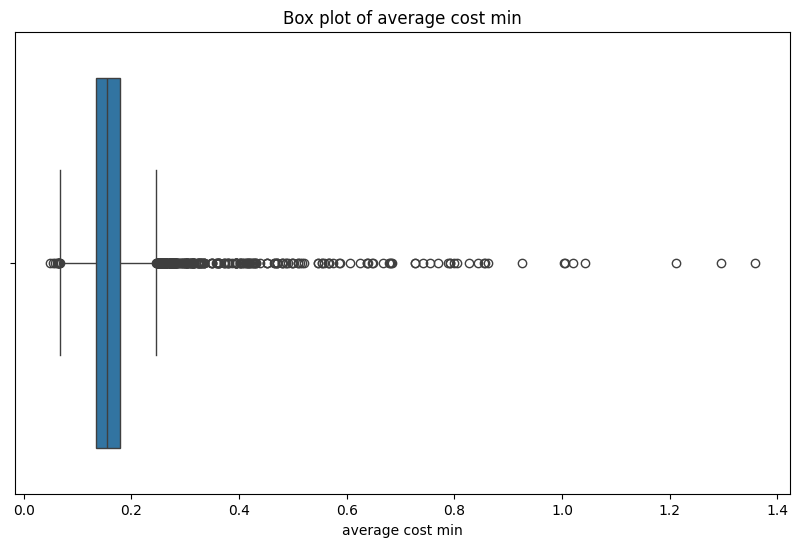

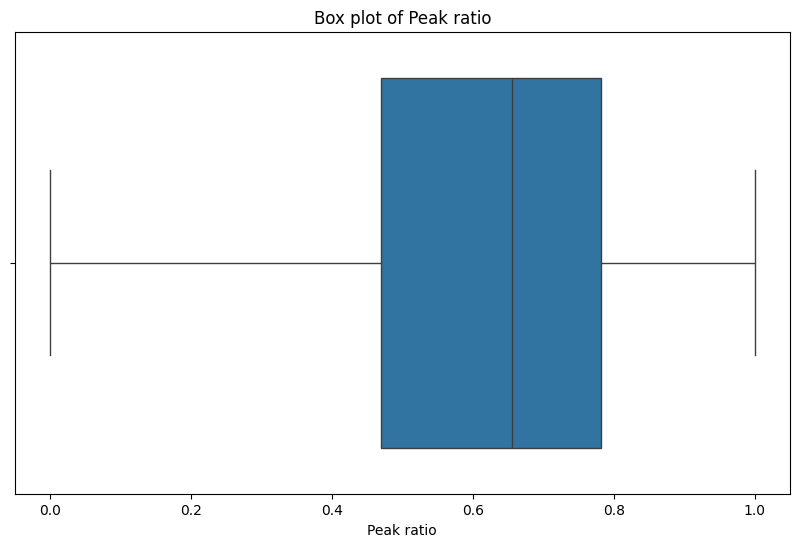

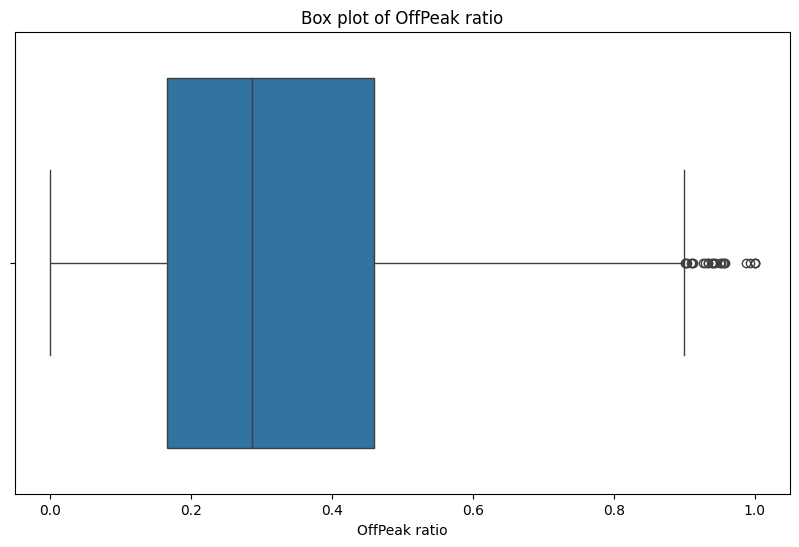

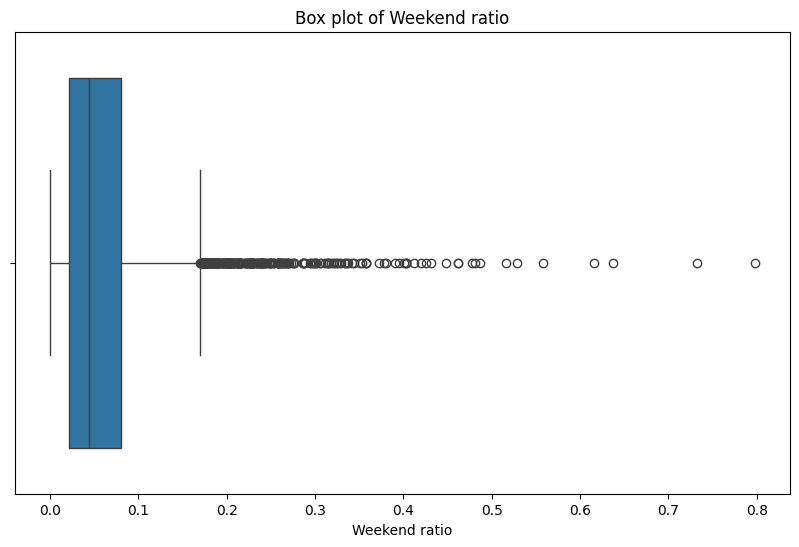

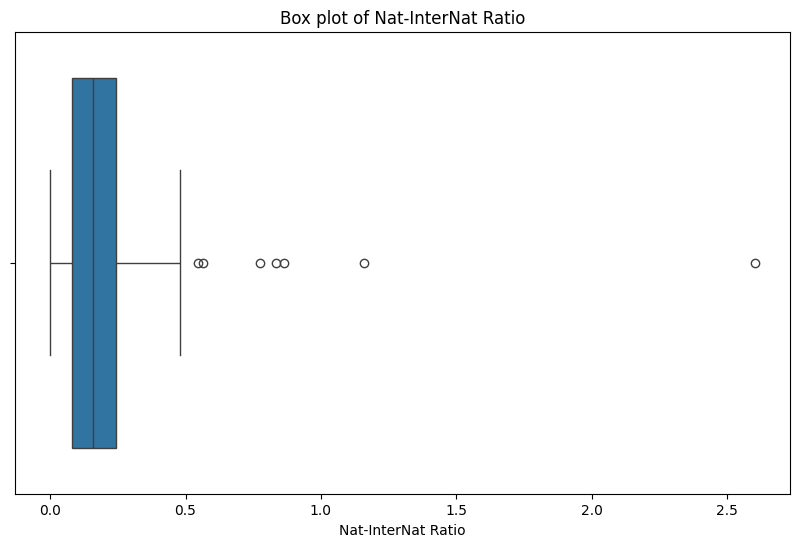

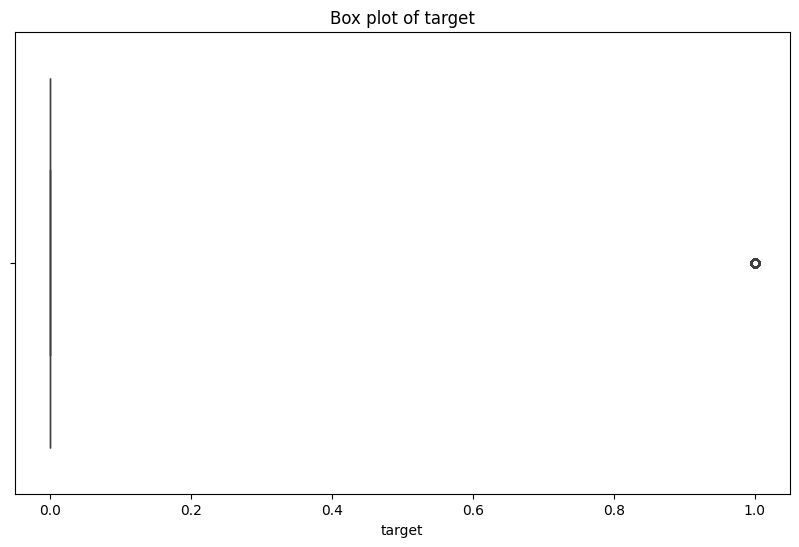

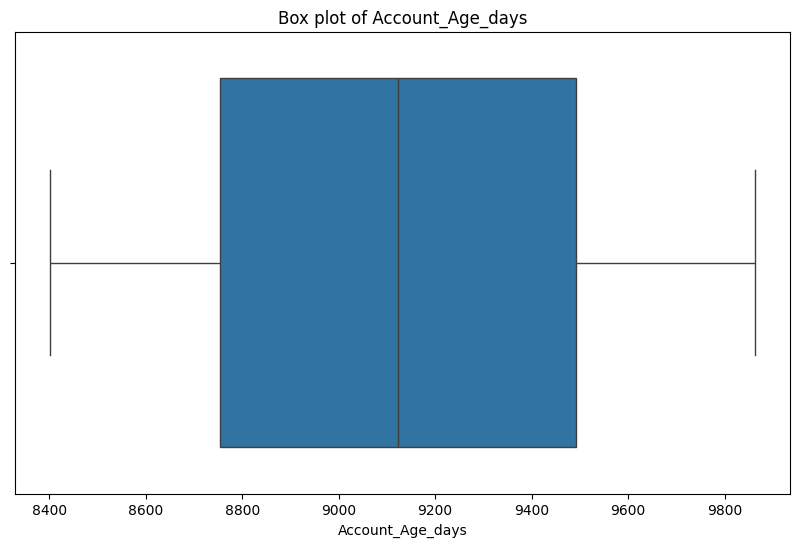

In [118]:
# Plotting box plots for all numerical columns
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=train_df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

In [119]:
for col in numerical_cols:
    outliers = detect_outliers_iqr(train_df, col)
    print(f"Number of outliers in {col}: {len(outliers)}")

Number of outliers in Age: 67
Number of outliers in L_O_S: 0
Number of outliers in Dropped_Calls: 926
Number of outliers in Peak_calls_Sum: 215
Number of outliers in Peak_mins_Sum: 78
Number of outliers in OffPeak_calls_Sum: 145
Number of outliers in OffPeak_mins_Sum: 19
Number of outliers in Weekend_calls_Sum: 190
Number of outliers in Weekend_mins_Sum: 61
Number of outliers in International_mins_Sum: 179
Number of outliers in Nat_call_cost_Sum: 314
Number of outliers in AvePeak: 610
Number of outliers in AveOffPeak: 629
Number of outliers in AveWeekend: 587
Number of outliers in National_calls: 175
Number of outliers in National mins: 73
Number of outliers in AveNational: 424
Number of outliers in All_calls_mins: 88
Number of outliers in Dropped_calls_ratio: 507
Number of outliers in Mins_charge: 740
Number of outliers in call_cost_per_min: 27
Number of outliers in actual call cost: 320
Number of outliers in Total_call_cost: 226
Number of outliers in Total_Cost: 111
Number of outlier

### Feature Engineering

In [100]:
train_df['Connect_Date'] = pd.to_datetime(train_df['Connect_Date'], format='%d/%m/%y')

In [101]:
# Correcting Y2K dates - this step is necessary as pandas defaults '98' to 2098 instead of 1998
train_df['Connect_Date'] = train_df['Connect_Date'].apply(lambda x: x - pd.DateOffset(years=100) if x.year > 2022 else x)

In [103]:
reference_date = pd.to_datetime('2023-01-01')
train_df['Account_Age_days'] = (reference_date - train_df['Connect_Date']).dt.days

In [107]:
train_df['Connect_Month'] = train_df['Connect_Date'].dt.month
train_df['Connect_Quarter'] = train_df['Connect_Date'].dt.quarter
train_df['Connect_Year'] = train_df['Connect_Date'].dt.year

In [108]:
train_df.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,...,Weekend ratio,Nat-InterNat Ratio,high Dropped calls,No Usage,target,id,Account_Age_days,Connect_Month,Connect_Quarter,Connect_Year
0,F,50.0,1998-05-20,29.200000,2.0,Play 100,BS210,62.0,153.000000,185.0,...,0.046729,0.203034,F,F,0,K262360,8992,5,2,1998
1,M,25.0,1996-12-16,46.533333,1.0,CAT 100,ASAD90,146.0,718.800000,98.0,...,0.040404,0.273249,F,F,1,K170160,9512,12,4,1996
2,F,46.0,1997-08-27,38.066667,1.0,CAT 50,WC95,160.0,322.800000,7.0,...,0.000000,0.205025,F,F,0,K331610,9258,8,3,1997
3,F,59.0,1998-07-13,27.400000,1.0,CAT 50,BS110,84.0,317.400001,57.0,...,0.000000,0.050090,F,F,0,K332460,8938,7,3,1998
4,F,25.0,1999-01-08,21.433333,1.0,Play 300,WC95,14.0,309.600000,326.0,...,0.014972,0.090509,F,F,0,K394220,8759,1,1,1999


In [132]:
# Convert 'Connect_Date' to datetime format
test_df['Connect_Date'] = pd.to_datetime(test_df['Connect_Date'], format='%d/%m/%y')

# Correcting Y2K dates
test_df['Connect_Date'] = test_df['Connect_Date'].apply(lambda x: x - pd.DateOffset(years=100) if x.year > 2022 else x)

# Calculate 'Account_Age_days' feature
reference_date = pd.to_datetime('2023-01-01')
test_df['Account_Age_days'] = (reference_date - test_df['Connect_Date']).dt.days

# Create additional temporal features
test_df['Connect_Month'] = test_df['Connect_Date'].dt.month
test_df['Connect_Quarter'] = test_df['Connect_Date'].dt.quarter
test_df['Connect_Year'] = test_df['Connect_Date'].dt.year


In [144]:
test_df.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,...,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,high Dropped calls,No Usage,id,Account_Age_days,Connect_Month,Connect_Quarter,Connect_Year
0,F,20.0,1996-05-23,55.582251,3.0,CAT 200,WC95,513.0,1075.667903,110.0,...,0.173365,0.009823,0.020349,F,F,K751808,9719,5,2,1996
1,F,54.0,1998-03-01,32.067010,0.0,Play 300,BS110,13.0,378.078657,93.0,...,0.532898,0.022391,0.124480,F,F,K837351,9072,3,1,1998
2,F,28.0,1998-10-11,26.621954,0.0,CAT 200,ASAD170,1000.0,2064.343139,90.0,...,0.034434,0.006660,0.225763,F,F,K548114,8848,10,4,1998
3,F,26.0,1998-08-12,27.652735,5.0,CAT 200,WC95,122.0,999.111887,126.0,...,0.263256,0.005870,0.108872,F,F,K736156,8908,8,3,1998
4,F,34.0,1998-10-28,25.479355,0.0,CAT 100,WC95,164.0,742.647381,73.0,...,0.166995,0.056390,0.090896,F,F,K508080,8831,10,4,1998


## Building the Model Pipeline

### Decision tree

### Logistic regression

### iForest

### XGBoost

### Neural Networks

## Submission => Leaderboard